In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airpassengers.csv')
df_airline.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df_airline.shape

(144, 2)

In [4]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df_airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df_airline.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
print(df_airline.columns)

Index(['Month', 'Passengers'], dtype='object')


In [10]:
df_airline.set_index('Month',inplace=True)

In [11]:
df_airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

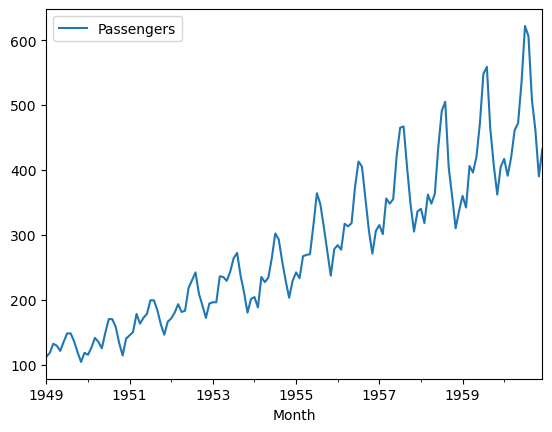

In [12]:
df_airline.plot()

### Step1 : Stationarity of data

Dicky Fuller Test 

In [13]:
from statsmodels.tsa.stattools import adfuller

# it returns p-value >> Hypothesis Testing
# ho >>> Null 
# h1 >>> Alternate

In [14]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

# if p >= .05   (Ho) True    ( non stationary)
#   else : fails Ha               (Stationary)

In [15]:
adf_test(df_airline['Passengers'])

ADF Statistics: 0.8153688792060597
p- value: 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Passengers']-df_airline['Passengers'].shift(1)

In [17]:
df_airline

,Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [18]:
df_airline.head()

,Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824169992
p- value: 0.0542132902838265
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [24]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)


In [25]:
df_airline

,Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


In [26]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468527
p- value: 2.732891850014085e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [27]:
df_airline

,Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


In [28]:
df_airline

,Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


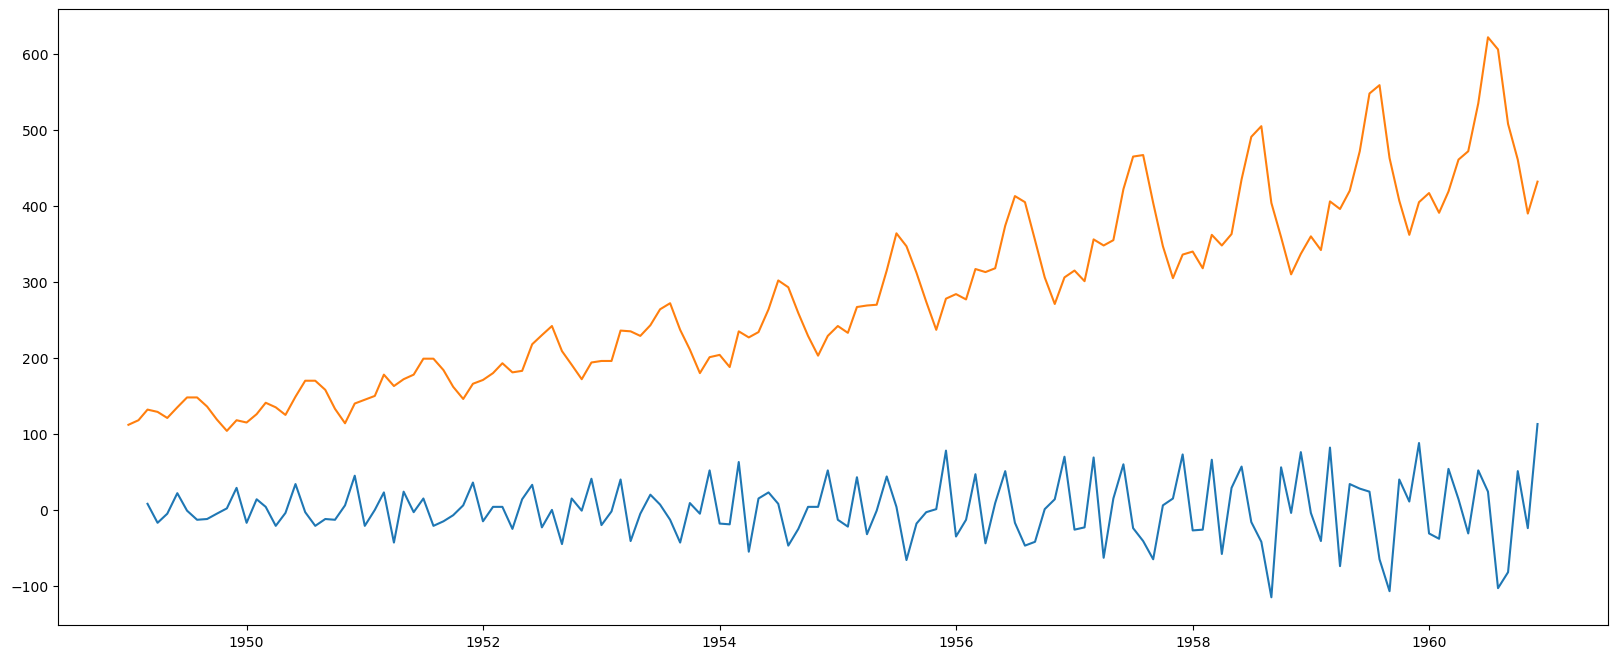

In [29]:
plt.figure(figsize=(20,8))
plt.plot(df_airline['Passengers Second Difference'].dropna())
plt.plot(df_airline['Passengers'])

In [30]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Passengers']-df_airline['Passengers'].shift(12)

In [31]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


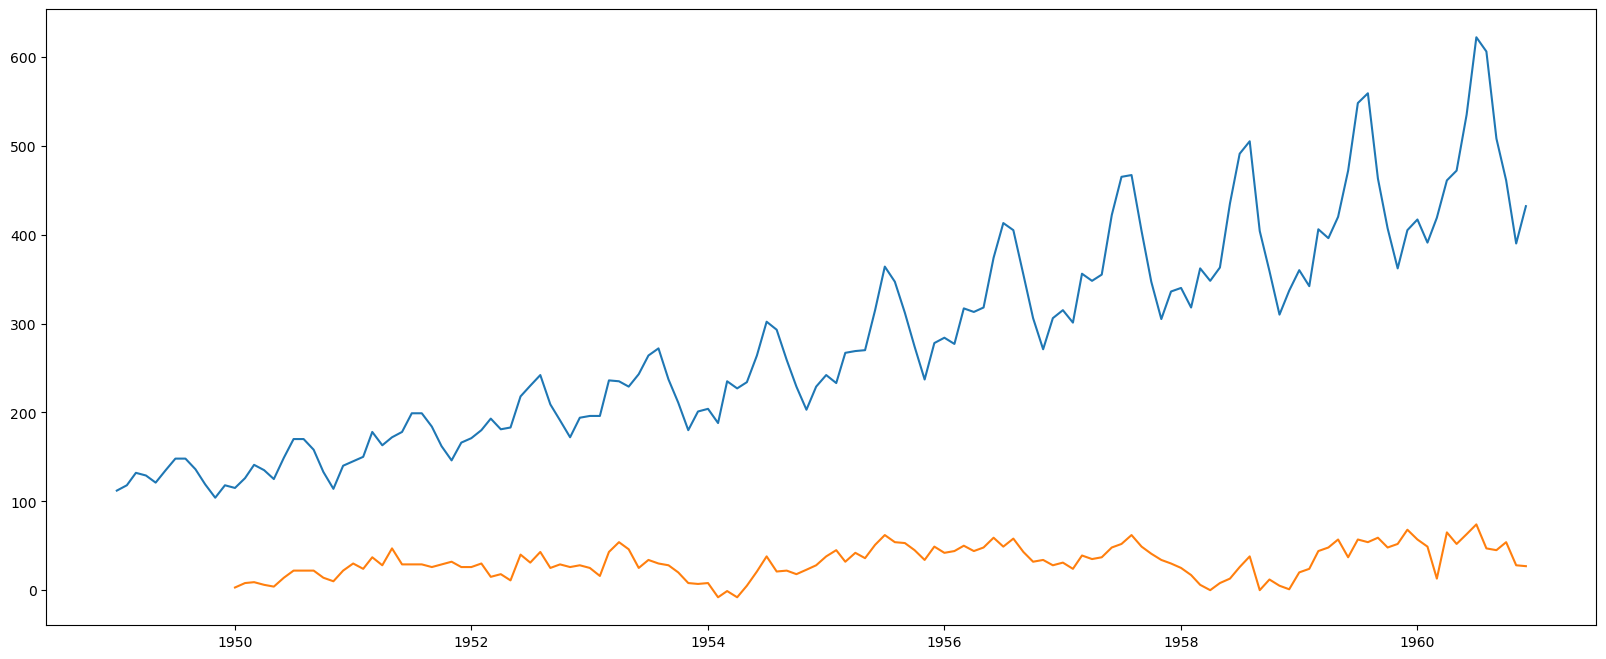

In [32]:
plt.figure(figsize=(20,8))
plt.plot(df_airline['Passengers'])
plt.plot(df_airline['Passengers 12 Difference'].dropna())

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

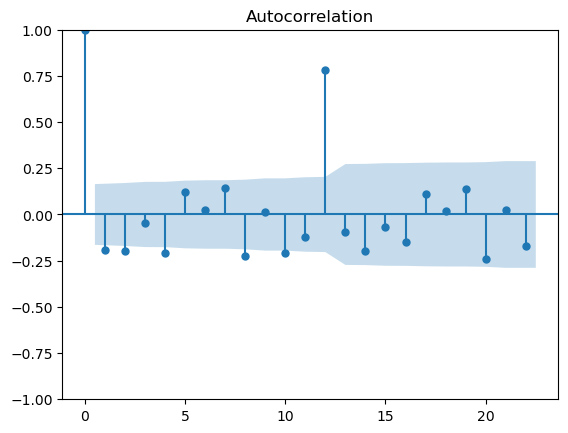

In [34]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


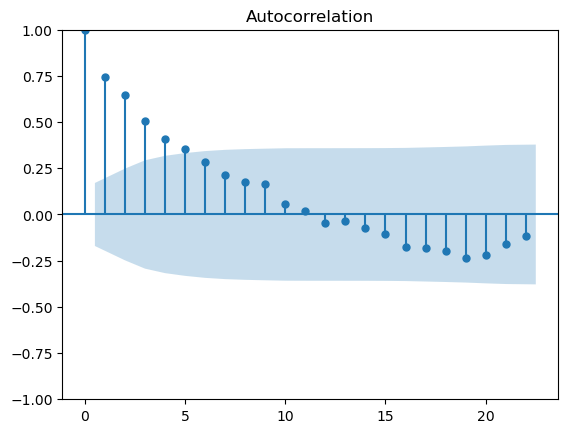

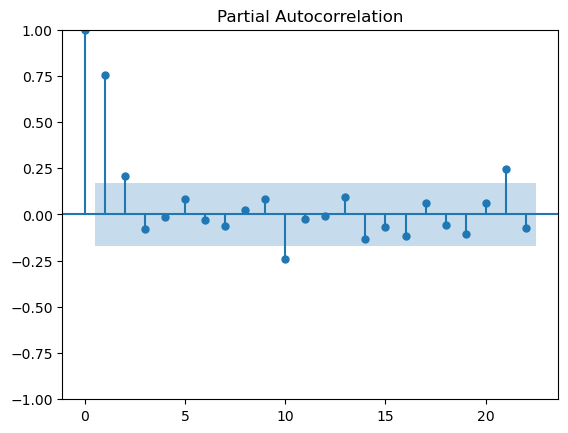

In [35]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

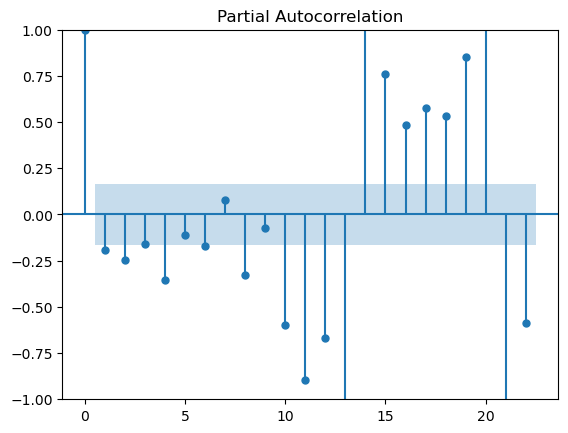

In [36]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

In [37]:
# pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [38]:
### split train and test data
df_airline

,Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [39]:
from datetime import datetime,timedelta
train_dataset_end= datetime(1955,12,1)
test_dataset_end= datetime(1960,12,31)

In [40]:
train_data=df_airline.iloc[:100]
test_data=df_airline.iloc[100:]


In [41]:
test_data.index[-1]

Timestamp('1960-12-01 00:00:00')

In [42]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [43]:
test_data

,Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1957-05-01,355,7.0,15.0,37.0
1957-06-01,422,67.0,60.0,48.0
1957-07-01,465,43.0,-24.0,52.0
1957-08-01,467,2.0,-41.0,62.0
1957-09-01,404,-63.0,-65.0,49.0
1957-10-01,347,-57.0,6.0,41.0
1957-11-01,305,-42.0,15.0,34.0
1957-12-01,336,31.0,73.0,30.0
1958-01-01,340,4.0,-27.0,25.0


In [51]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [52]:
train_data

,Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1956-12-01,306,35.0,70.0,28.0
1957-01-01,315,9.0,-26.0,31.0
1957-02-01,301,-14.0,-23.0,24.0


In [53]:
model_ARIMA=ARIMA(train_data['Passengers'],order=(5,2,7))

C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  100
Model:                 ARIMA(5, 2, 7)   Log Likelihood                -423.586
Date:                Wed, 20 Sep 2023   AIC                            873.171
Time:                        23:09:36   BIC                            906.776
Sample:                    01-01-1949   HQIC                           886.764
                         - 04-01-1957                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6248      0.147     -4.255      0.000      -0.913      -0.337
ar.L2         -0.5340      0.139     -3.854      0.000      -0.806      -0.262
ar.L3         -0.4454      0.131     -3.398      0.001      -0.702      -0.189
ar.L4         -0.5703      0.152     -3.753      0.000      -0.868      -0.273
ar.L5         -0.2556      0.166     -1.536      0.125      -0.582       0.071
ma.L1         -0.2934     43.533     -0.007      0.995     -85.617      85.030
ma.L2         -0.5794     27.685     -0.021      0.983     -54.842      53.683
ma.L3         -0.1314     54.620     -0.002      0.998    -107.185     106.922
ma.L4         -0.0977     49.885     -0.002      0.998     -97.871      97.675
ma.L5         -0.6247     22.065     -0.028      0.977     -43.871      42.622
ma.L6         -0.2461     45.168     -0.005      0.996     -88.773      88.281
ma.L7          0.9736     58.646      0.017      0.987    -113.971     115.918
sigma2       247.0519   1.49e+04      0.017      0.987   -2.89e+04    2.94e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.22
Prob(Q):                              0.68   Prob(JB):                         0.54
Heteroskedasticity (H):               3.74   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1957-05-01 00:00:00
1960-12-01 00:00:00


In [57]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
pred

1957-05-01    321.003594
1957-06-01    335.559019
1957-07-01    354.970025
1957-08-01    353.090735
1957-09-01    342.031090
1957-10-01    343.344256
1957-11-01    342.513786
1957-12-01    351.405722
1958-01-01    360.535418
1958-02-01    360.569406
1958-03-01    359.888934
1958-04-01    359.409046
1958-05-01    360.615634
1958-06-01    366.106499
1958-07-01    370.663199
1958-08-01    372.832793
1958-09-01    374.071374
1958-10-01    374.707857
1958-11-01    376.718525
1958-12-01    380.207063
1959-01-01    383.447769
1959-02-01    386.023459
1959-03-01    387.858918
1959-04-01    389.428214
1959-05-01    391.618862
1959-06-01    394.335757
1959-07-01    397.102771
1959-08-01    399.621728
1959-09-01    401.748175
1959-10-01    403.771031
1959-11-01    406.015591
1959-12-01    408.480436
1960-01-01    411.022668
1960-02-01    413.459587
1960-03-01    415.722899
1960-04-01    417.934140
1960-05-01    420.217082
1960-06-01    422.600638
1960-07-01    425.032169
1960-08-01    427.422137


In [58]:
residuals=test_data['Passengers']-pred

In [59]:
pred

1957-05-01    321.003594
1957-06-01    335.559019
1957-07-01    354.970025
1957-08-01    353.090735
1957-09-01    342.031090
1957-10-01    343.344256
1957-11-01    342.513786
1957-12-01    351.405722
1958-01-01    360.535418
1958-02-01    360.569406
1958-03-01    359.888934
1958-04-01    359.409046
1958-05-01    360.615634
1958-06-01    366.106499
1958-07-01    370.663199
1958-08-01    372.832793
1958-09-01    374.071374
1958-10-01    374.707857
1958-11-01    376.718525
1958-12-01    380.207063
1959-01-01    383.447769
1959-02-01    386.023459
1959-03-01    387.858918
1959-04-01    389.428214
1959-05-01    391.618862
1959-06-01    394.335757
1959-07-01    397.102771
1959-08-01    399.621728
1959-09-01    401.748175
1959-10-01    403.771031
1959-11-01    406.015591
1959-12-01    408.480436
1960-01-01    411.022668
1960-02-01    413.459587
1960-03-01    415.722899
1960-04-01    417.934140
1960-05-01    420.217082
1960-06-01    422.600638
1960-07-01    425.032169
1960-08-01    427.422137


In [60]:
residuals

Month
1957-05-01     33.996406
1957-06-01     86.440981
1957-07-01    110.029975
1957-08-01    113.909265
1957-09-01     61.968910
1957-10-01      3.655744
1957-11-01    -37.513786
1957-12-01    -15.405722
1958-01-01    -20.535418
1958-02-01    -42.569406
1958-03-01      2.111066
1958-04-01    -11.409046
1958-05-01      2.384366
1958-06-01     68.893501
1958-07-01    120.336801
1958-08-01    132.167207
1958-09-01     29.928626
1958-10-01    -15.707857
1958-11-01    -66.718525
1958-12-01    -43.207063
1959-01-01    -23.447769
1959-02-01    -44.023459
1959-03-01     18.141082
1959-04-01      6.571786
1959-05-01     28.381138
1959-06-01     77.664243
1959-07-01    150.897229
1959-08-01    159.378272
1959-09-01     61.251825
1959-10-01      3.228969
1959-11-01    -44.015591
1959-12-01     -3.480436
1960-01-01      5.977332
1960-02-01    -22.459587
1960-03-01      3.277101
1960-04-01     43.065860
1960-05-01     51.782918
1960-06-01    112.399362
1960-07-01    196.967831
1960-08-01    178.5

<Axes: ylabel='Density'>

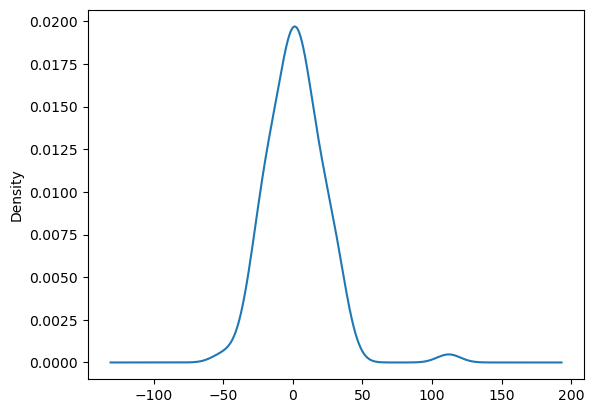

In [61]:
model_Arima_fit.resid.plot(kind='kde')

In [62]:
test_data['Predicted_ARIMA']=pred

C:\Users\abc\AppData\Local\Temp\ipykernel_12924\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

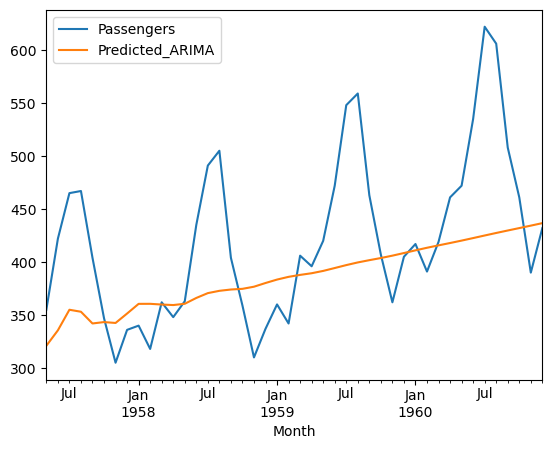

In [63]:
test_data[['Passengers','Predicted_ARIMA']].plot()

C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


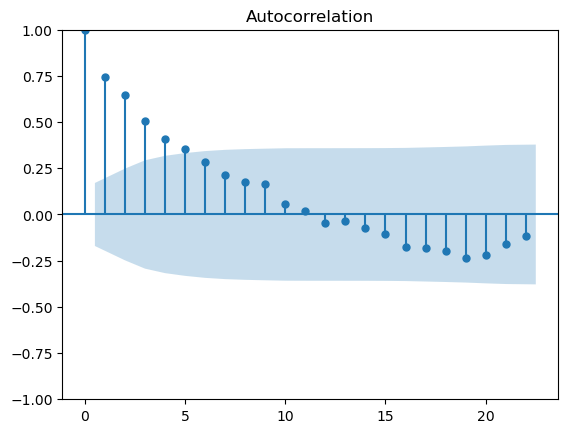

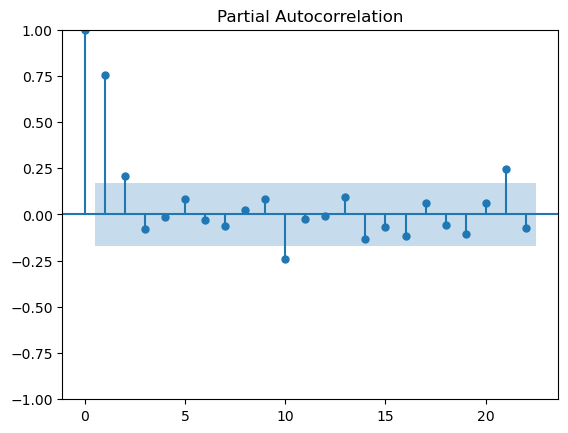

In [64]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [65]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
model_SARIMA=SARIMAX(train_data['Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [67]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                  100
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -321.801
Date:                             Wed, 20 Sep 2023   AIC                            661.603
Time:                                     23:09:40   BIC                            683.899
Sample:                                 01-01-1949   HQIC                           670.585
                                      - 04-01-1957                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1355      0.193     -0.703      0.482      -0.513       0.242
ar.L2          0.1447      0.192      0.755      0.450      -0.231       0.520
ar.L3          0.9592      0.194      4.943      0.000       0.579       1.340
ma.L1          0.8550      0.200      4.273      0.000       0.463       1.247
ma.L2          0.7642      0.249      3.069      0.002       0.276       1.252
ma.L3         -0.4511      0.162     -2.784      0.005      -0.769      -0.133
ma.L4         -0.2719      0.146     -1.865      0.062      -0.558       0.014
ma.L5         -0.3162      0.126     -2.516      0.012      -0.563      -0.070
sigma2        84.2826     13.767      6.122      0.000      57.300     111.266
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.93   Prob(JB):                         0.28
Heteroskedasticity (H):               1.41   Skew:                             0.41
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
test_data.tail()

,Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,427.422137
1960-09-01,508,-98.0,-82.0,45.0,429.740059
1960-10-01,461,-47.0,51.0,54.0,432.028109
1960-11-01,390,-71.0,-24.0,28.0,434.338727
1960-12-01,432,42.0,113.0,27.0,436.694726


In [70]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1957-05-01 00:00:00
1960-12-01 00:00:00


In [71]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,5,1),end=datetime(1960,12,1))
residuals=test_data['Passengers']-pred_Sarima

<Axes: xlabel='Month'>

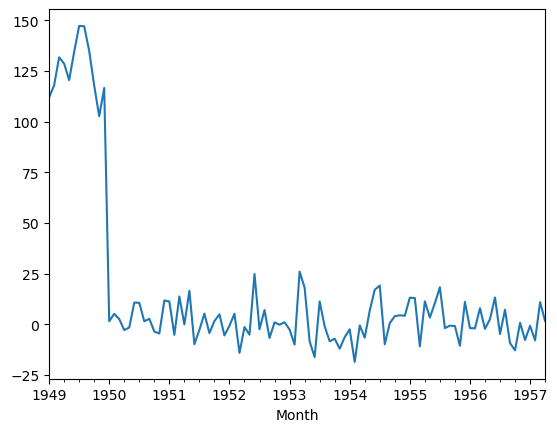

In [72]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

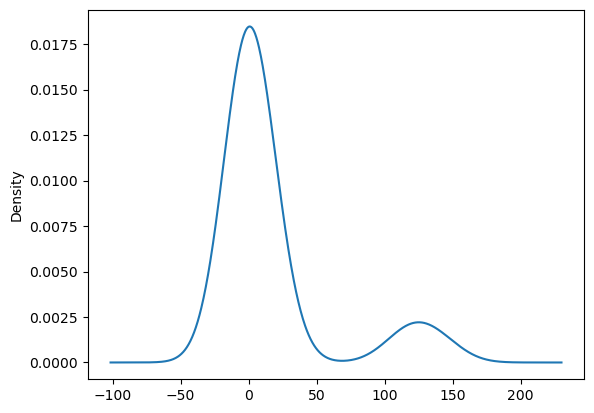

In [73]:
model_SARIMA_fit.resid.plot(kind='kde')

In [74]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\abc\AppData\Local\Temp\ipykernel_12924\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [75]:
test_data

,Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1957-05-01,355,7.0,15.0,37.0,321.003594,357.908976
1957-06-01,422,67.0,60.0,48.0,335.559019,409.775528
1957-07-01,465,43.0,-24.0,52.0,354.970025,446.336120
1957-08-01,467,2.0,-41.0,62.0,353.090735,440.053303
1957-09-01,404,-63.0,-65.0,49.0,342.031090,388.884731
1957-10-01,347,-57.0,6.0,41.0,343.344256,338.456644
1957-11-01,305,-42.0,15.0,34.0,342.513786,305.128237
1957-12-01,336,31.0,73.0,30.0,351.405722,338.574135
1958-01-01,340,4.0,-27.0,25.0,360.535418,346.656795


<Axes: xlabel='Month'>

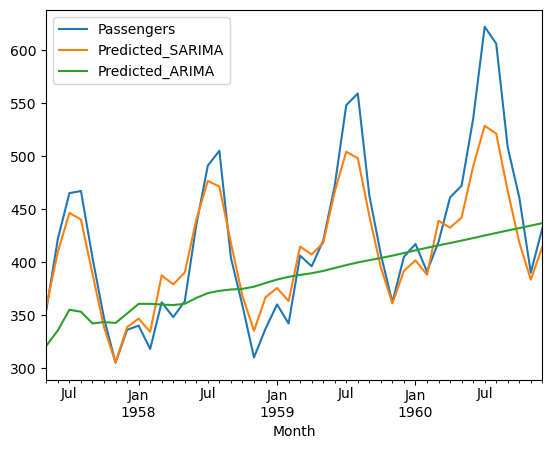

In [76]:
test_data[['Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()